# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import json
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [1]:
url = 'http://api.openweathermap.org/data/2.5/weather?q='
api_key1 ='&appid=' + weather_api_key
units = '&units=imperial'
#testing api key
response = requests.get(url + cities[0] + units + api_key1).json()
#print(json.dumps(response, indent=4, sort_keys=True))
#pprint(response)

#create df, set columns
city_data = pd.DataFrame(columns= ['City', 'Lat', 'Lon', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country', 'Date'])
city_data['City'] = cities
#city_data['Lat'] = city_data['Lat'].astype('double64')
#city_data['Lon'] = city_data['Lon'].astype('double64')
city_data

NameError: name 'weather_api_key' is not defined

In [4]:
print('Beginning data retrieval')
city = ''
for city in cities:
    
    
    try:
        print(f'checking data for: {city} | {cities.index(city)+1} of {len(cities)}')
        response = requests.get(url + city + units + api_key1).json()
                
        city_data.loc[city_data['City']==city, 'Lat'] = response['coord']['lat']
        city_data.loc[city_data['City']==city, 'Lon'] = response['coord']['lon']
        city_data.loc[city_data['City']==city, 'Max Temp'] = response['main']['temp_max']
        city_data.loc[city_data['City']==city, 'Humidity'] = response['main']['humidity']
        city_data.loc[city_data['City']==city, 'Wind Speed'] = response['wind']['speed']
        city_data.loc[city_data['City']==city, 'Country'] = response['sys']['country']
        city_data.loc[city_data['City']==city, 'Cloudiness'] = response['clouds']['all']
        city_data.loc[city_data['City']==city, 'Date'] = response['dt']
        
    except (KeyError, IndexError):
        print('City not found. Skipping...')
        
#City not found. Skipping...
print('FINISHED')

Beginning data retrieval
checking data for: barrow | 1 of 631
checking data for: albany | 2 of 631
checking data for: rikitea | 3 of 631
checking data for: kandalaksha | 4 of 631
checking data for: atuona | 5 of 631
checking data for: bilibino | 6 of 631
checking data for: arlit | 7 of 631
checking data for: vaini | 8 of 631
checking data for: mataura | 9 of 631
checking data for: inongo | 10 of 631
checking data for: san andres | 11 of 631
checking data for: bluff | 12 of 631
checking data for: clyde river | 13 of 631
checking data for: tupik | 14 of 631
checking data for: ahipara | 15 of 631
checking data for: miraflores | 16 of 631
checking data for: college | 17 of 631
checking data for: bulgan | 18 of 631
checking data for: livramento | 19 of 631
checking data for: uji | 20 of 631
checking data for: cayenne | 21 of 631
checking data for: atar | 22 of 631
checking data for: mar del plata | 23 of 631
checking data for: torbay | 24 of 631
checking data for: ushuaia | 25 of 631
checki

checking data for: miri | 191 of 631
checking data for: nabire | 192 of 631
checking data for: along | 193 of 631
checking data for: brae | 194 of 631
checking data for: belushya guba | 195 of 631
City not found. Skipping...
checking data for: padang | 196 of 631
checking data for: airai | 197 of 631
checking data for: povenets | 198 of 631
checking data for: marzuq | 199 of 631
checking data for: norman wells | 200 of 631
checking data for: yerofey pavlovich | 201 of 631
checking data for: attawapiskat | 202 of 631
City not found. Skipping...
checking data for: sur | 203 of 631
checking data for: barra do garcas | 204 of 631
checking data for: talavera | 205 of 631
checking data for: komsomolskiy | 206 of 631
checking data for: saint george | 207 of 631
checking data for: meulaboh | 208 of 631
checking data for: bathsheba | 209 of 631
checking data for: ngaoundere | 210 of 631
checking data for: keningau | 211 of 631
checking data for: abalak | 212 of 631
checking data for: tandil | 2

checking data for: benguela | 380 of 631
checking data for: conchagua | 381 of 631
checking data for: labutta | 382 of 631
City not found. Skipping...
checking data for: thompson | 383 of 631
checking data for: vaitupu | 384 of 631
City not found. Skipping...
checking data for: bloomfield | 385 of 631
checking data for: dondaicha | 386 of 631
checking data for: coihaique | 387 of 631
checking data for: mpanda | 388 of 631
checking data for: beira | 389 of 631
checking data for: varhaug | 390 of 631
checking data for: boone | 391 of 631
checking data for: manadhoo | 392 of 631
checking data for: arauca | 393 of 631
checking data for: abaete | 394 of 631
checking data for: curup | 395 of 631
checking data for: namibe | 396 of 631
checking data for: seidu | 397 of 631
checking data for: portland | 398 of 631
checking data for: nuuk | 399 of 631
checking data for: luanda | 400 of 631
checking data for: nguiu | 401 of 631
City not found. Skipping...
checking data for: wanning | 402 of 631
c

City not found. Skipping...
checking data for: kenitra | 571 of 631
checking data for: laguna | 572 of 631
checking data for: trofors | 573 of 631
checking data for: glogow | 574 of 631
checking data for: mandalgovi | 575 of 631
checking data for: arenal | 576 of 631
checking data for: billings | 577 of 631
checking data for: esna | 578 of 631
checking data for: russell | 579 of 631
checking data for: podor | 580 of 631
checking data for: lompoc | 581 of 631
checking data for: viedma | 582 of 631
checking data for: uvalde | 583 of 631
checking data for: zhob | 584 of 631
checking data for: jutai | 585 of 631
checking data for: malinovoye ozero | 586 of 631
checking data for: klaksvik | 587 of 631
checking data for: mindelo | 588 of 631
checking data for: saleilua | 589 of 631
City not found. Skipping...
checking data for: zyryanka | 590 of 631
checking data for: deep river | 591 of 631
checking data for: malpe | 592 of 631
checking data for: doha | 593 of 631
checking data for: ban nah

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame
city_data.head()

In [5]:
city_data

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,barrow,71.29,-156.79,30.2,86,90,17.22,US,1603596139
1,albany,42.6,-73.97,46,68,61,1.99,US,1603595863
2,rikitea,-23.12,-134.97,74.88,82,97,20.71,PF,1603595867
3,kandalaksha,67.16,32.41,27.88,97,92,4.36,RU,1603596140
4,atuona,-9.8,-139.03,78.66,75,30,20.56,PF,1603596140
...,...,...,...,...,...,...,...,...,...
626,atbasar,51.8,68.33,39.6,92,100,19.84,KZ,1603596225
627,mildura,-34.2,142.15,61,31,40,13.87,AU,1603596225
628,azrow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
629,solovetskiy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
city_data.to_csv('city_data.csv')

In [7]:
city_df = pd.read_csv('city_data.csv')
city_df.describe(percentiles = [0.25, 0.5, 0.75], include = 'all')

,Unnamed: 0,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
count,631.00000,631,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,576,5.780000e+02
unique,NaN,631,NaN,NaN,NaN,NaN,NaN,NaN,115,NaN
top,NaN,faanui,NaN,NaN,NaN,NaN,NaN,NaN,RU,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,70,NaN
mean,315.00000,NaN,21.001730,20.062422,59.267699,74.524221,55.704152,7.970727,NaN,1.603596e+09
std,182.29829,NaN,32.965026,89.314044,20.543998,19.966704,38.860199,5.677873,NaN,1.696090e+02
min,0.00000,NaN,-54.800000,-179.170000,6.750000,11.000000,0.000000,0.000000,NaN,1.603595e+09
25%,157.50000,NaN,-3.875000,-59.122500,44.600000,64.000000,17.000000,3.605000,NaN,1.603596e+09
50%,315.00000,NaN,23.120000,23.400000,62.785000,79.000000,72.000000,6.700000,NaN,1.603596e+09
75%,472.50000,NaN,48.500000,101.790000,76.252500,91.000000,91.000000,10.840000,NaN,1.603596e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

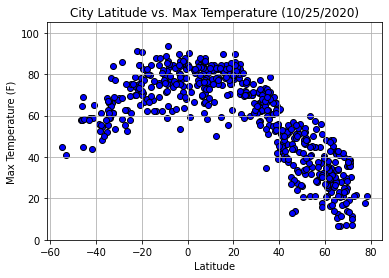

In [23]:
x_axis = city_df['Lat']
y_axis = city_df['Max Temp']

x = plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
plt.ylim(0, 105)
plt.title("City Latitude vs. Max Temperature (10/25/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.savefig("WeatherPy_Images/lat_temp.png")

plt.grid()
plt.show()

## Latitude vs. Humidity Plot

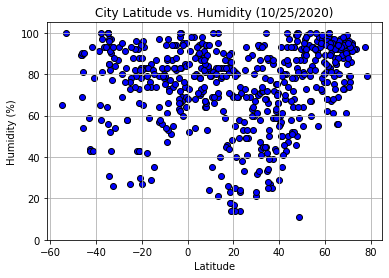

In [26]:
x_axis = city_df['Lat']
y_axis = city_df['Humidity']

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
plt.ylim(0, 105)
plt.title("City Latitude vs. Humidity (10/25/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("WeatherPy_Images/lat_hum.png")

## Latitude vs. Cloudiness Plot

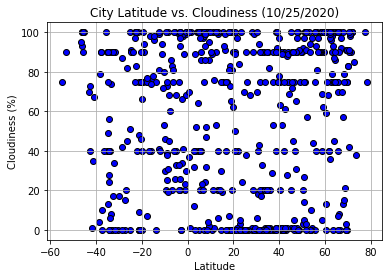

In [28]:
x_axis = city_df['Lat']
y_axis = city_df['Cloudiness']

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
plt.ylim(-5, 105)
plt.title("City Latitude vs. Cloudiness (10/25/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("WeatherPy_Images/City Latitude vs. Cloudiness.png")

## Latitude vs. Wind Speed Plot

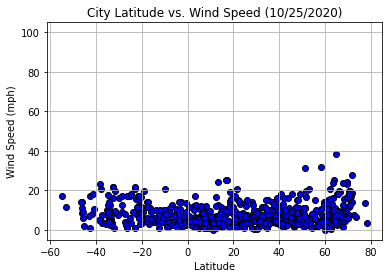

In [29]:
x_axis = city_df['Lat']
y_axis = city_df['Wind Speed']

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
plt.ylim(-5, 105)
plt.title("City Latitude vs. Wind Speed (10/25/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("WeatherPy_Images/City Latitude vs. Wind Speed.png")

## Linear Regression

The r-value is: -0.8896231136339836


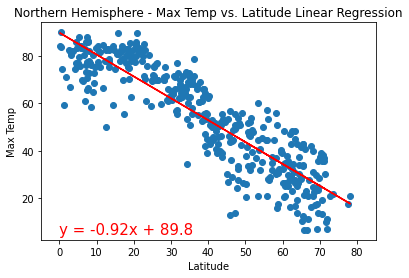

In [30]:
#start by isolating values for north hemisphere
north_hem = (city_df.loc[city_df['Lat']>= 0])
north_lat = pd.to_numeric(north_hem['Lat'])

#set values to be graphed
x_values = north_lat
y_values = north_hem['Max Temp']

#invoke stats.linregress
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0, 5),fontsize=15,color="red",)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

#adjust xlim for Northern Hemisphere
plt.xlim(-5, 85)

print(f'The r-value is: {rvalue}')
plt.savefig("WeatherPy_Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6779419349810334


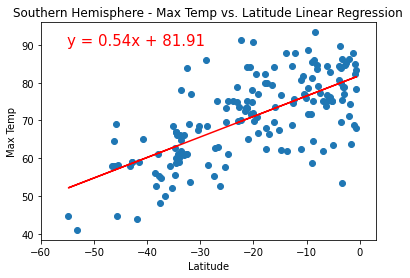

In [31]:
#start by isolating values for southern hemisphere
south_hem = (city_df.loc[city_df['Lat']<= 0])
south_lat = pd.to_numeric(south_hem['Lat'])

#set values to be graphed
x_values = south_lat
y_values = south_hem['Max Temp']

#invoke stats.linregress
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55, 90),fontsize=15,color="red",)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

#adjust xlim for Southern hemisphere
plt.xlim(-60, 3)

print(f'The r-value is: {rvalue}')
plt.savefig("WeatherPy_Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.29302104595415246


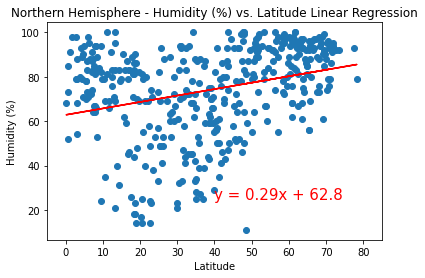

In [32]:
#set values to be graphed
x_values = north_lat
y_values = north_hem['Humidity']

#invoke stats.linregress
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40, 25),fontsize=15,color="red",)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

#adjust xlim for Northern hemisphere
plt.xlim(-5, 85)

print(f'The r-value is: {rvalue}')
plt.savefig("WeatherPy_Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
#set values to be graphed
x_values = south_lat
y_values = south_hem['Humidity']

#invoke stats.linregress
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55, 10),fontsize=15,color="red",)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

#adjust xlim for Southern hemisphere
plt.xlim(-60, 3)


print(f'The r-value is: {rvalue}')
plt.savefig("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.15338869243971368


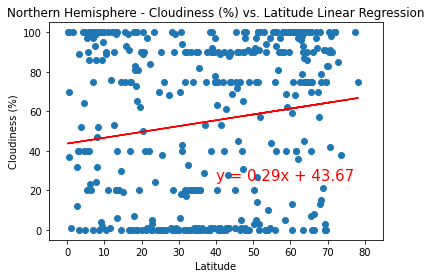

In [33]:
x_values = north_lat
y_values = north_hem['Cloudiness']

#invoke stats.linregress
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40, 25),fontsize=15,color="red",)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

#adjust xlim for Northern hemisphere
plt.xlim(-5, 85)

print(f'The r-value is: {rvalue}')
plt.savefig("WeatherPy_Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.06330084838200253


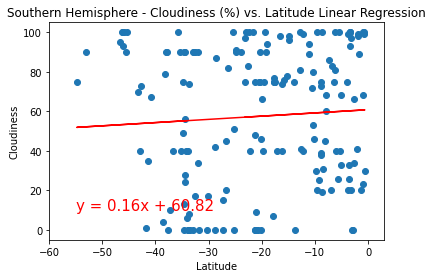

In [34]:
#set values to be graphed
x_values = south_lat
y_values = south_hem['Cloudiness']

#invoke stats.linregress
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55, 10),fontsize=15,color="red",)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

#adjust xlim for Southern hemisphere
plt.xlim(-60, 3)

print(f'The r-value is: {rvalue}')
plt.savefig("WeatherPy_Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.23537361060483944


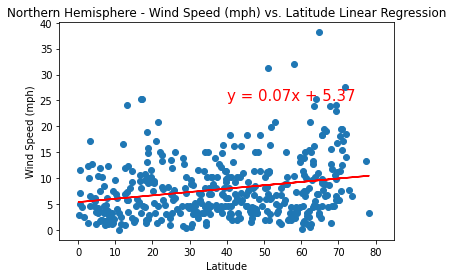

In [35]:
x_values = north_lat
y_values = north_hem['Wind Speed']

#invoke stats.linregress
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40, 25),fontsize=15,color="red",)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

#adjust xlim for Northern hemisphere
plt.xlim(-5, 85)

print(f'The r-value is: {rvalue}')
plt.savefig("WeatherPy_Images/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.29678245865063446


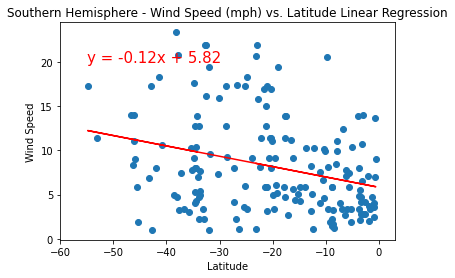

In [38]:
#set values to be graphed
x_values = south_lat
y_values = south_hem['Wind Speed']

#invoke stats.linregress
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55, 20),fontsize=15,color="red",)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

#adjust xlim for Southern hemisphere
plt.xlim(-60, 3)

print(f'The r-value is: {rvalue}')
plt.savefig("WeatherPy_Images/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")